[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/repos-especializacion-UdeA/data-raw/blob/main/notebooks/merge_databases.ipynb)

# Combinación de todas las bases de datos

El siguiente notebook explora de manera sencilla un archivo de matlab donde se guarda la información de un sensor.

In [1]:
try:
    import scipy.io
except ImportError:
    !pip install scipy

## 1. Librerias y configuraciones previas

In [2]:
import sys
import os

# Get the absolute path of the current notebook
notebook_path = "."
print(notebook_path)
try:
    import google.colab
    !git clone https://github.com/repos-especializacion-UdeA/data-raw.git
    %cd /content/data-raw/notebooks   
    %pwd
    ruta_base = '/content/data-raw/notebooks/'
    sys.path.append(ruta_base)
except ImportError:
    print("El notebook no se está ejecutando en Google Colab.")
    ruta_base = './'

.
El notebook no se está ejecutando en Google Colab.


In [3]:
# command to view figures in Jupyter notebook
%matplotlib inline 

# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
import scipy as sc

# Almacenar en caché los resultados de funciones en el disco
# ==============================================================================
import joblib


# Gestion de librerias
# ==============================================================================
from importlib import reload

# Matemáticas y estadísticas
# ==============================================================================
import math

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Formateo y estilo
# ==============================================================================
from IPython.display import Markdown, display

# Biblioteca scipy y componentes
# ==============================================================================
import scipy.io
from scipy import signal


## 2. Funciones

In [4]:
# Funciones externas
# ==============================================================================
# from utils.funciones1 import multiple_plot
# from utils.funciones2 import test_hola, graficar_medida, graficar_medida2, filter_signal, \
#                             segmentar_data_base, aplanar_data_base, aplanar_ventana

In [5]:
# test_hola()

## 3. Carga del dataset

In [6]:
DATASETS_PATH = "./raw_datasets/"

archivos_mat = ['S1_A1_E1.mat', 
         'S2_A1_E1.mat', 
         'S3_A1_E1.mat', 
         'S4_A1_E1.mat', 
         'S5_A1_E1.mat', 
         'S6_A1_E1.mat', 
         'S7_A1_E1.mat', 
         'S8_A1_E1.mat', 
         'S9_A1_E1.mat', 
         'S10_A1_E1.mat', 
         'S11_A1_E1.mat', 
         'S12_A1_E1.mat', 
         'S13_A1_E1.mat', 
         'S14_A1_E1.mat', 
         'S15_A1_E1.mat', 
         'S16_A1_E1.mat', 
         'S17_A1_E1.mat', 
         'S18_A1_E1.mat', 
         'S19_A1_E1.mat', 
         'S20_A1_E1.mat', 
         'S21_A1_E1.mat', 
         'S22_A1_E1.mat', 
         'S23_A1_E1.mat', 
         'S24_A1_E1.mat', 
         'S25_A1_E1.mat', 
         'S26_A1_E1.mat',
         'S27_A1_E1.mat']

Visualización de las caracteristicas del archivo MAT cargado. Se toma una muestra del primer archivo solamente

In [ ]:
archivo_mat = scipy.io.loadmat(DATASETS_PATH + archivos_mat[0])
print(type(archivo_mat))
print(archivo_mat.keys())

<class 'dict'>
dict_keys(['__header__', '__version__', '__globals__', 'emg', 'stimulus', 'glove', 'subject', 'exercise', 'repetition', 'restimulus', 'rerepetition'])


#### Metadatos

In [29]:
# Metadatos
print("Metadatos del archivo")
for key in list(archivo_mat.keys())[:3]:
    # print(key,": ",archivo_mat[key],sep = "")
    print(f"{key}: {archivo_mat[key]} | tipo:{type(archivo_mat[key])}")

Metadatos del archivo
__header__: b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Mon Jul 28 11:54:15 2014' | tipo:<class 'bytes'>
__version__: 1.0 | tipo:<class 'str'>
__globals__: [] | tipo:<class 'list'>


#### Informacion de los sensores

In [34]:
# Informacion de los sensores
print("Sensores")
for key in ['emg','glove']:
    f, c = archivo_mat[key].shape
    print(f"{key}: F: {f}; C: {c} | tipo:{type(archivo_mat[key])}")

Sensores
emg: F: 101014; C: 10 | tipo:<class 'numpy.ndarray'>
glove: F: 101014; C: 22 | tipo:<class 'numpy.ndarray'>


#### Informacion sobre el ejercicio

In [41]:
## Carga de la base de datos
for key in ['subject', 'exercise']:
    f, c = archivo_mat[key].shape
    print(f"{key}: {archivo_mat[key][0,0]} | tipo:{type(archivo_mat[key])}")

subject: 1 | tipo:<class 'numpy.ndarray'>
exercise: 1 | tipo:<class 'numpy.ndarray'>


#### Estimulos

In [45]:
## Carga de la base de datos
for key in ['stimulus', 'repetition', 'restimulus', 'rerepetition']:
    f, c = archivo_mat[key].shape
    print(f"{key}: F: {f}; C: {c} | tipo:{type(archivo_mat[key])}")

stimulus: F: 101014; C: 1 | tipo:<class 'numpy.ndarray'>
repetition: F: 101014; C: 1 | tipo:<class 'numpy.ndarray'>
restimulus: F: 101014; C: 1 | tipo:<class 'numpy.ndarray'>
rerepetition: F: 101014; C: 1 | tipo:<class 'numpy.ndarray'>


Carga de cada una de las bases de datos asociadas a los sugetos y combinación en una sola.

In [ ]:
for i in range(len(archivos_mat)):
    ruta_archivo_mat = DATASETS_PATH + archivos_mat[i]
    # print(ruta_archivo_mat)
    archivo_mat = scipy.io.loadmat(ruta_archivo_mat)
    # Obtencion de las columnas de interes
    df_emg = pd.DataFrame(archivo_mat['emg'])
    df_emg.columns = ['emg_' + str(col + 1) for col in df_emg.columns]
    df_restimulus = pd.DataFrame(archivo_mat['restimulus'])
    df_restimulus.rename(columns={0: 'label'}, inplace= True)
    df_repetition = pd.DataFrame(archivo_mat['rerepetition'])
    df_repetition.rename(columns={0: 'rep'},inplace= True)
    df_subject = pd.DataFrame({'s': [i + 1] * df_repetition.shape[0]}, dtype='int8')
    df_subject =  pd.concat([df_subject, df_emg, df_repetition, df_restimulus], axis=1)
    print(f"Muestras sujeto {i + 1}: {df_subject.shape[0]}")
    data_base = pd.concat([data_base, df_subject], ignore_index=True)

stimulus: F: 101014; C: 1 | tipo:<class 'numpy.ndarray'>
subject: F: 1; C: 1 | tipo:<class 'numpy.ndarray'>
exercise: F: 1; C: 1 | tipo:<class 'numpy.ndarray'>
repetition: F: 101014; C: 1 | tipo:<class 'numpy.ndarray'>
restimulus: F: 101014; C: 1 | tipo:<class 'numpy.ndarray'>
rerepetition: F: 101014; C: 1 | tipo:<class 'numpy.ndarray'>
Muestras sujeto 1: 101014


NameError: name 'data_base' is not defined

## Informacion de la base de datos

In [16]:
data_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2731393 entries, 0 to 2731392
Data columns (total 13 columns):
 #   Column  Dtype  
---  ------  -----  
 0   s       int8   
 1   emg_1   float64
 2   emg_2   float64
 3   emg_3   float64
 4   emg_4   float64
 5   emg_5   float64
 6   emg_6   float64
 7   emg_7   float64
 8   emg_8   float64
 9   emg_9   float64
 10  emg_10  float64
 11  rep     uint8  
 12  label   uint8  
dtypes: float64(10), int8(1), uint8(2)
memory usage: 216.2 MB


### Contenido de los primeros registros del dataframe

In [17]:
# Primeros registros
data_base.head(2)

,s,emg_1,emg_2,emg_3,emg_4,emg_5,emg_6,emg_7,emg_8,emg_9,emg_10,rep,label
0,1,0.0684,0.0024,0.0024,0.0024,0.0024,0.0098,0.0024,0.0488,0.0024,0.0342,0,0
1,1,0.0586,0.0024,0.0024,0.0024,0.0024,0.0049,0.0024,0.0415,0.0024,0.0293,0,0


In [18]:
# Primeros registros sugeto 1
df_s1 = data_base[data_base['s'] == 1]
df_s1.head()

,s,emg_1,emg_2,emg_3,emg_4,emg_5,emg_6,emg_7,emg_8,emg_9,emg_10,rep,label
0,1,0.0684,0.0024,0.0024,0.0024,0.0024,0.0098,0.0024,0.0488,0.0024,0.0342,0,0
1,1,0.0586,0.0024,0.0024,0.0024,0.0024,0.0049,0.0024,0.0415,0.0024,0.0293,0,0
2,1,0.0562,0.0024,0.0024,0.0024,0.0024,0.0049,0.0024,0.0391,0.0024,0.0244,0,0
3,1,0.0562,0.0024,0.0024,0.0024,0.0024,0.0049,0.0024,0.0342,0.0024,0.0171,0,0
4,1,0.0488,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0366,0.0024,0.0146,0,0


## Graficacion

In [22]:
# commands to create high-resolution figures with large labels
%config InlineBackend.figure_formats = {'png', 'retina'} 
plt.rcParams['axes.labelsize'] = 18 # fontsize for figure labels
plt.rcParams['axes.titlesize'] = 20 # fontsize for figure titles
plt.rcParams['font.size'] = 16 # fontsize for figure numbers
plt.rcParams['lines.linewidth'] = 1.6 # line width for plotting

In [47]:
emg_channel1 =  df_s1['emg_1']
emg_channel2 =  df_s1['emg_2']
emg_channels =  df_s1[['emg_1','emg_2','emg_3']]

In [37]:
# extract number of channels, sample rate, data
numChannels = 2 # Numero de canales (solo vamos a graficar un canal)
N = len(emg_channel1) # Cantidad de muestras
sampleRate = 100 # Taza de muestreo
# dstr = record.readframes(N * numChannels)
# waveData = np.frombuffer(dstr, np.int16)

In [38]:
# get the time window
timeEMG=np.linspace(0, len(emg_channel1)/sampleRate, num=len(emg_channel1))

# calculate frequency
freq = 1/np.mean(np.diff(timeEMG))

print('The recording has %d channel(s).' % (numChannels))
print('The sampling rate of the recording is %d Hz.' % (sampleRate))

The recording has 2 channel(s).
The sampling rate of the recording is 100 Hz.


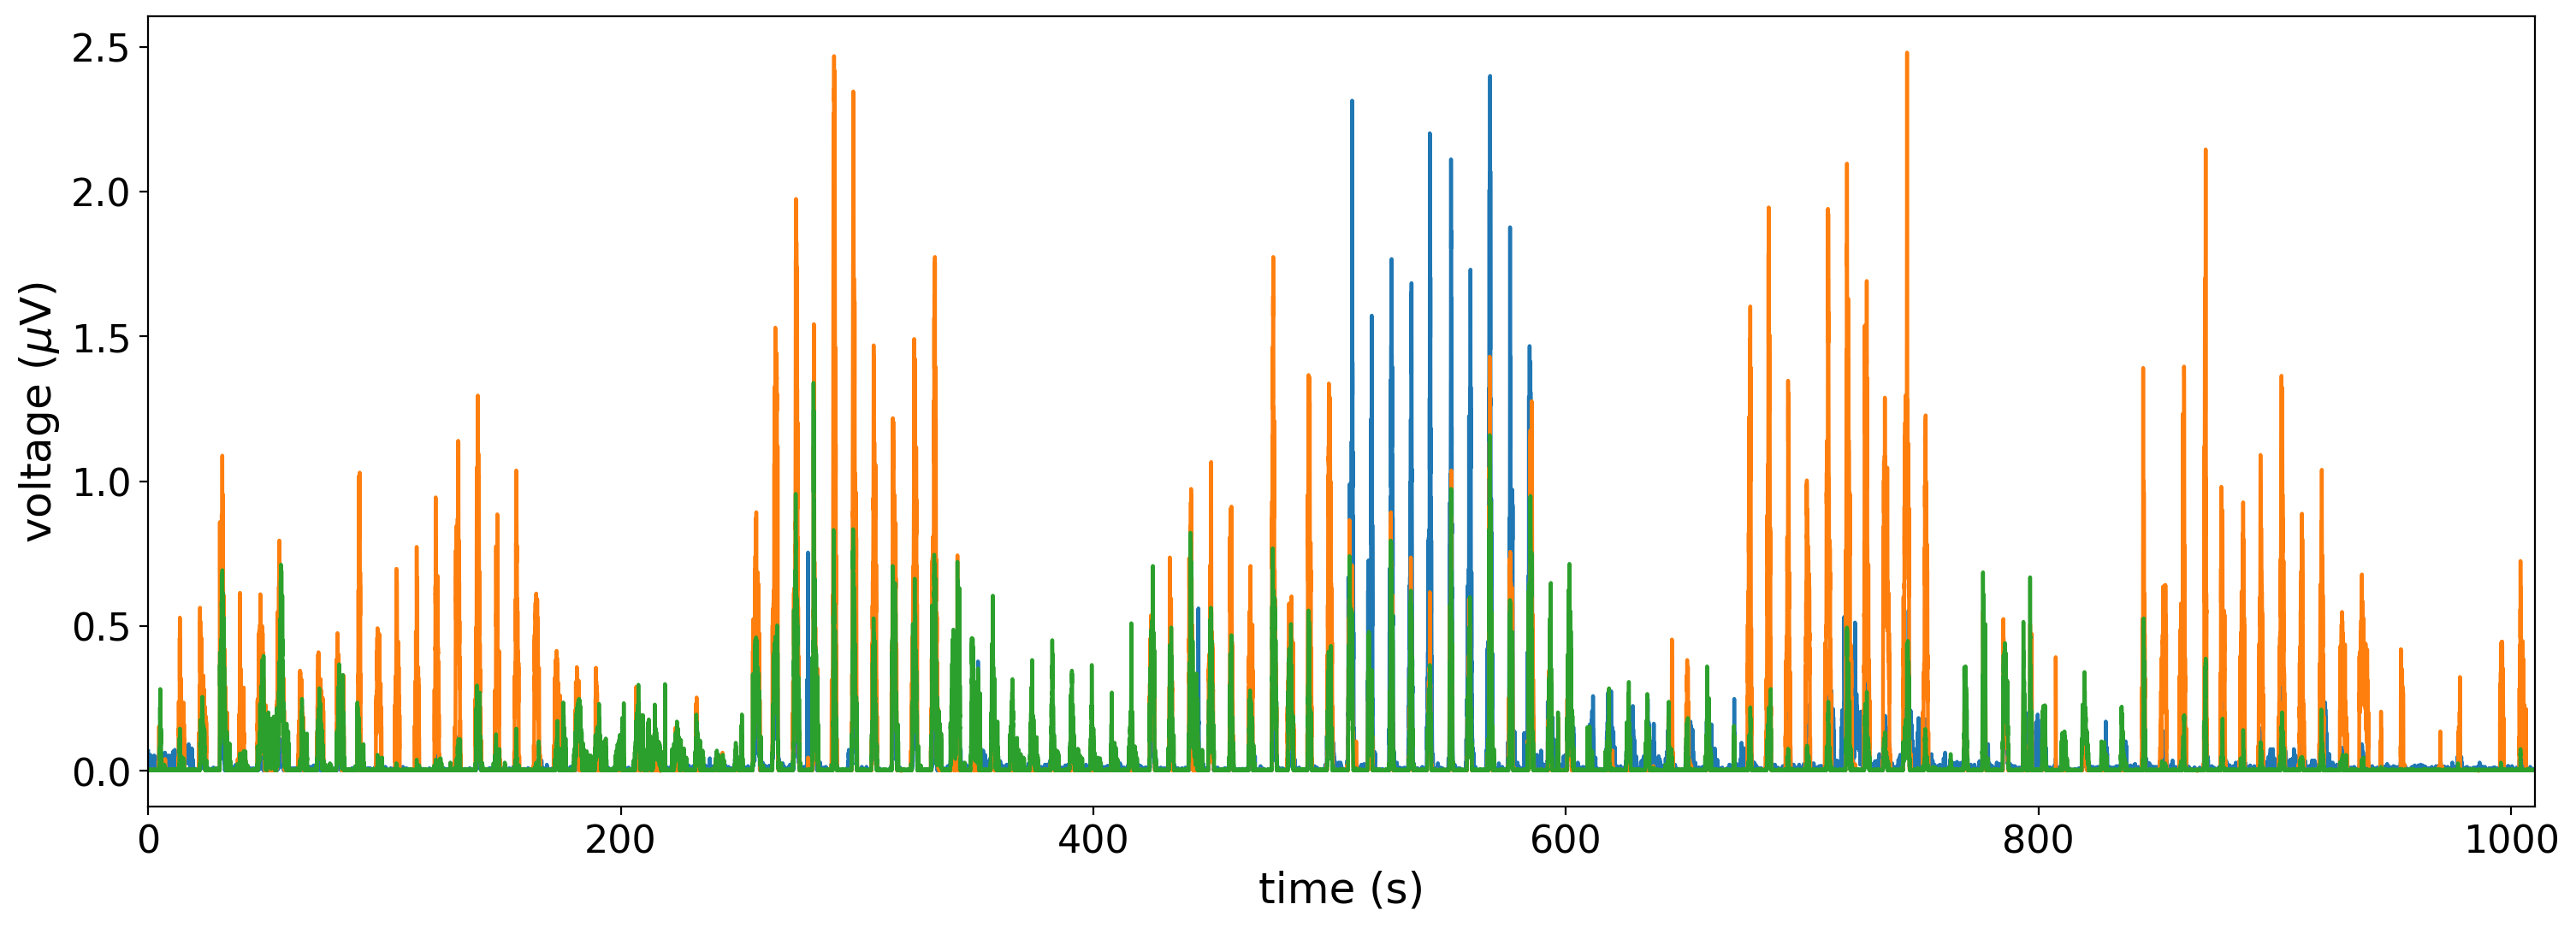

In [49]:
plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
# plt.plot(timeEMG,emg_channel1, emg_channel2)
plt.plot(timeEMG,emg_channels)
plt.xlim(0,max(timeEMG));

## Preprocesamiento de la señal

### Filtrado de ruido

A continuación se realiza un filtrado de ruido de la señal

In [50]:
# perform 2-order 1Hz low-pass filter
emgs_df_filt =  filter_signal(data_base.iloc[:,1:11])  
data_base_filter =  pd.concat([data_base['s'], emgs_df_filt, data_base['rep'] , data_base['label']], axis=1)
data_base_filter.head()

,s,emg_1,emg_2,emg_3,emg_4,emg_5,emg_6,emg_7,emg_8,emg_9,emg_10,rep,label
0,1,0.067523,0.002402,0.002399,0.002403,0.002395,0.009800,0.0024,0.050357,0.0024,0.034192,0,0
1,1,0.066284,0.002402,0.002402,0.002404,0.002395,0.009474,0.0024,0.049707,0.0024,0.032820,0,0
2,1,0.065045,0.002403,0.002405,0.002404,0.002395,0.009149,0.0024,0.049050,0.0024,0.031452,0,0
3,1,0.063810,0.002403,0.002409,0.002405,0.002395,0.008827,0.0024,0.048390,0.0024,0.030091,0,0
4,1,0.062581,0.002404,0.002412,0.002406,0.002395,0.008507,0.0024,0.047726,0.0024,0.028743,0,0


## Grafica de la señal mECG

A continuación se muestra la grafica de la señal de electromiografia superficial para el sugeto 1 ejecutando ejecutando las 12 posturas. 

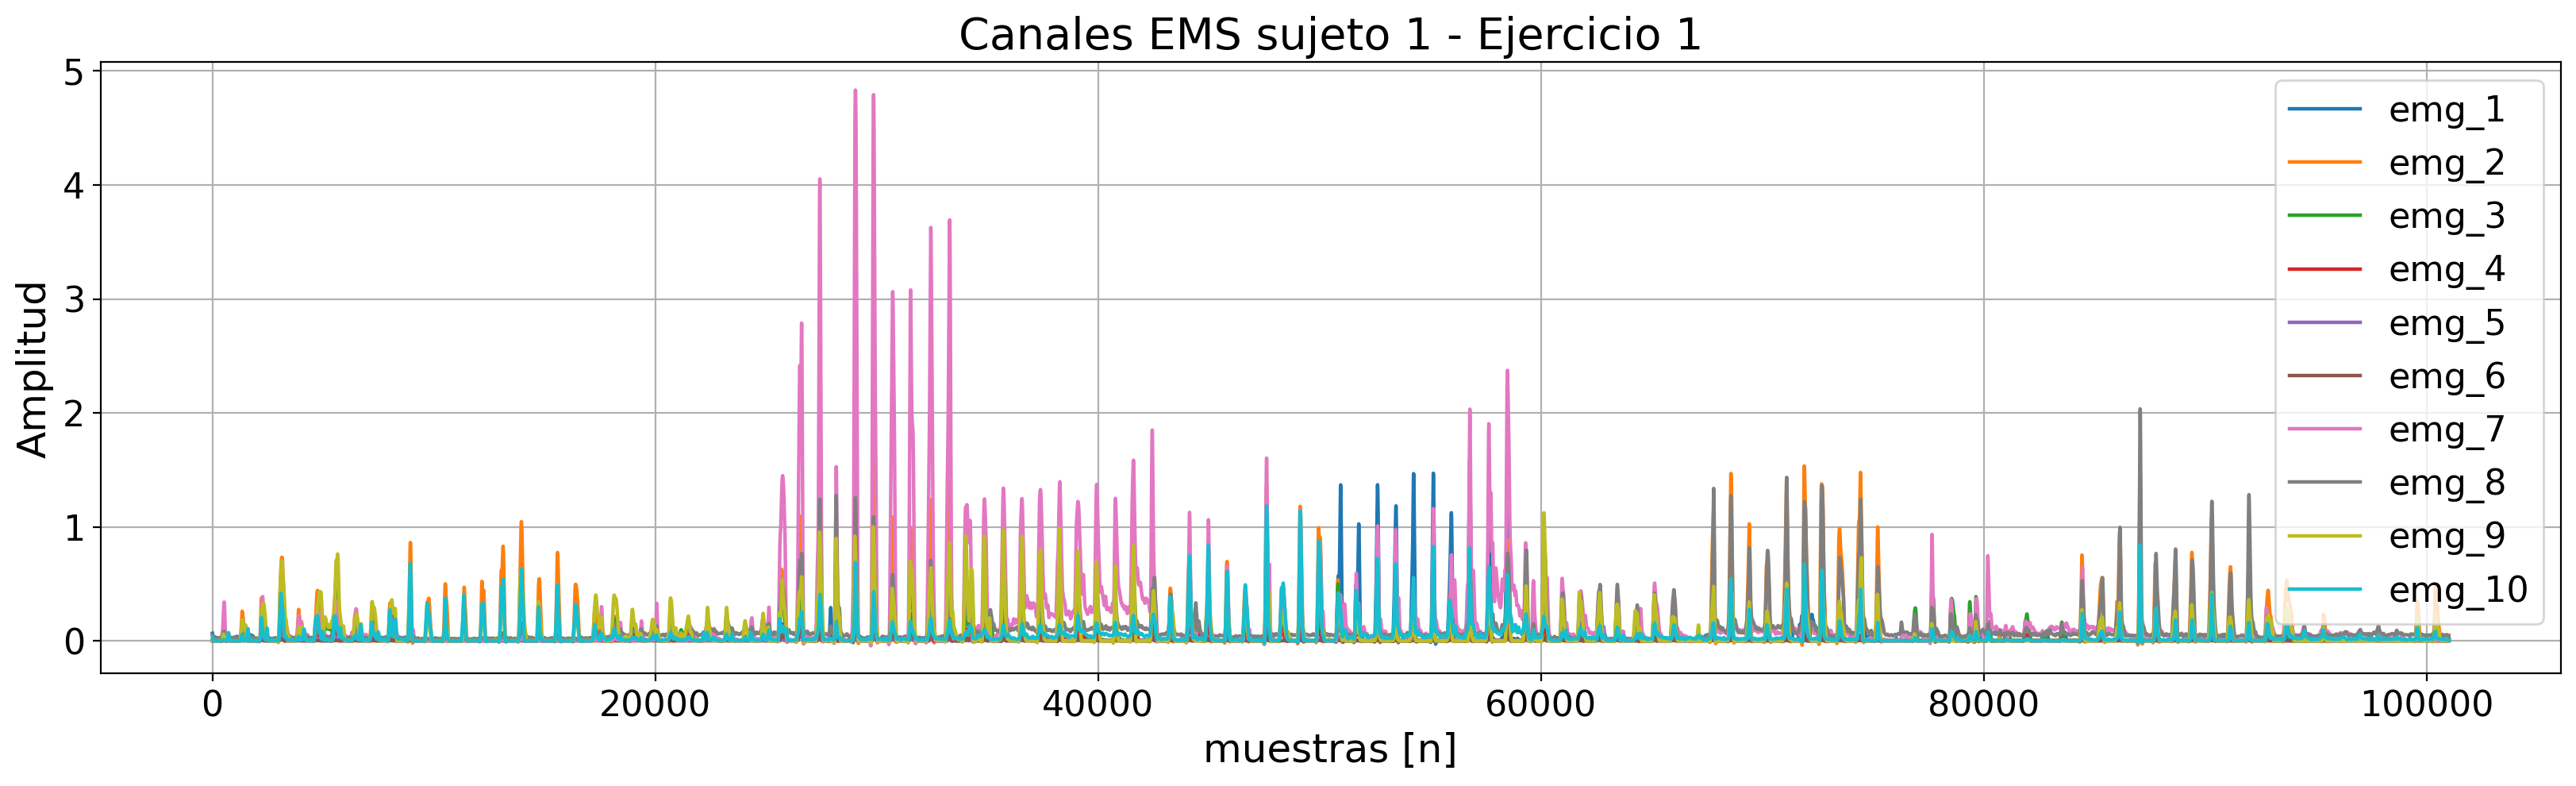

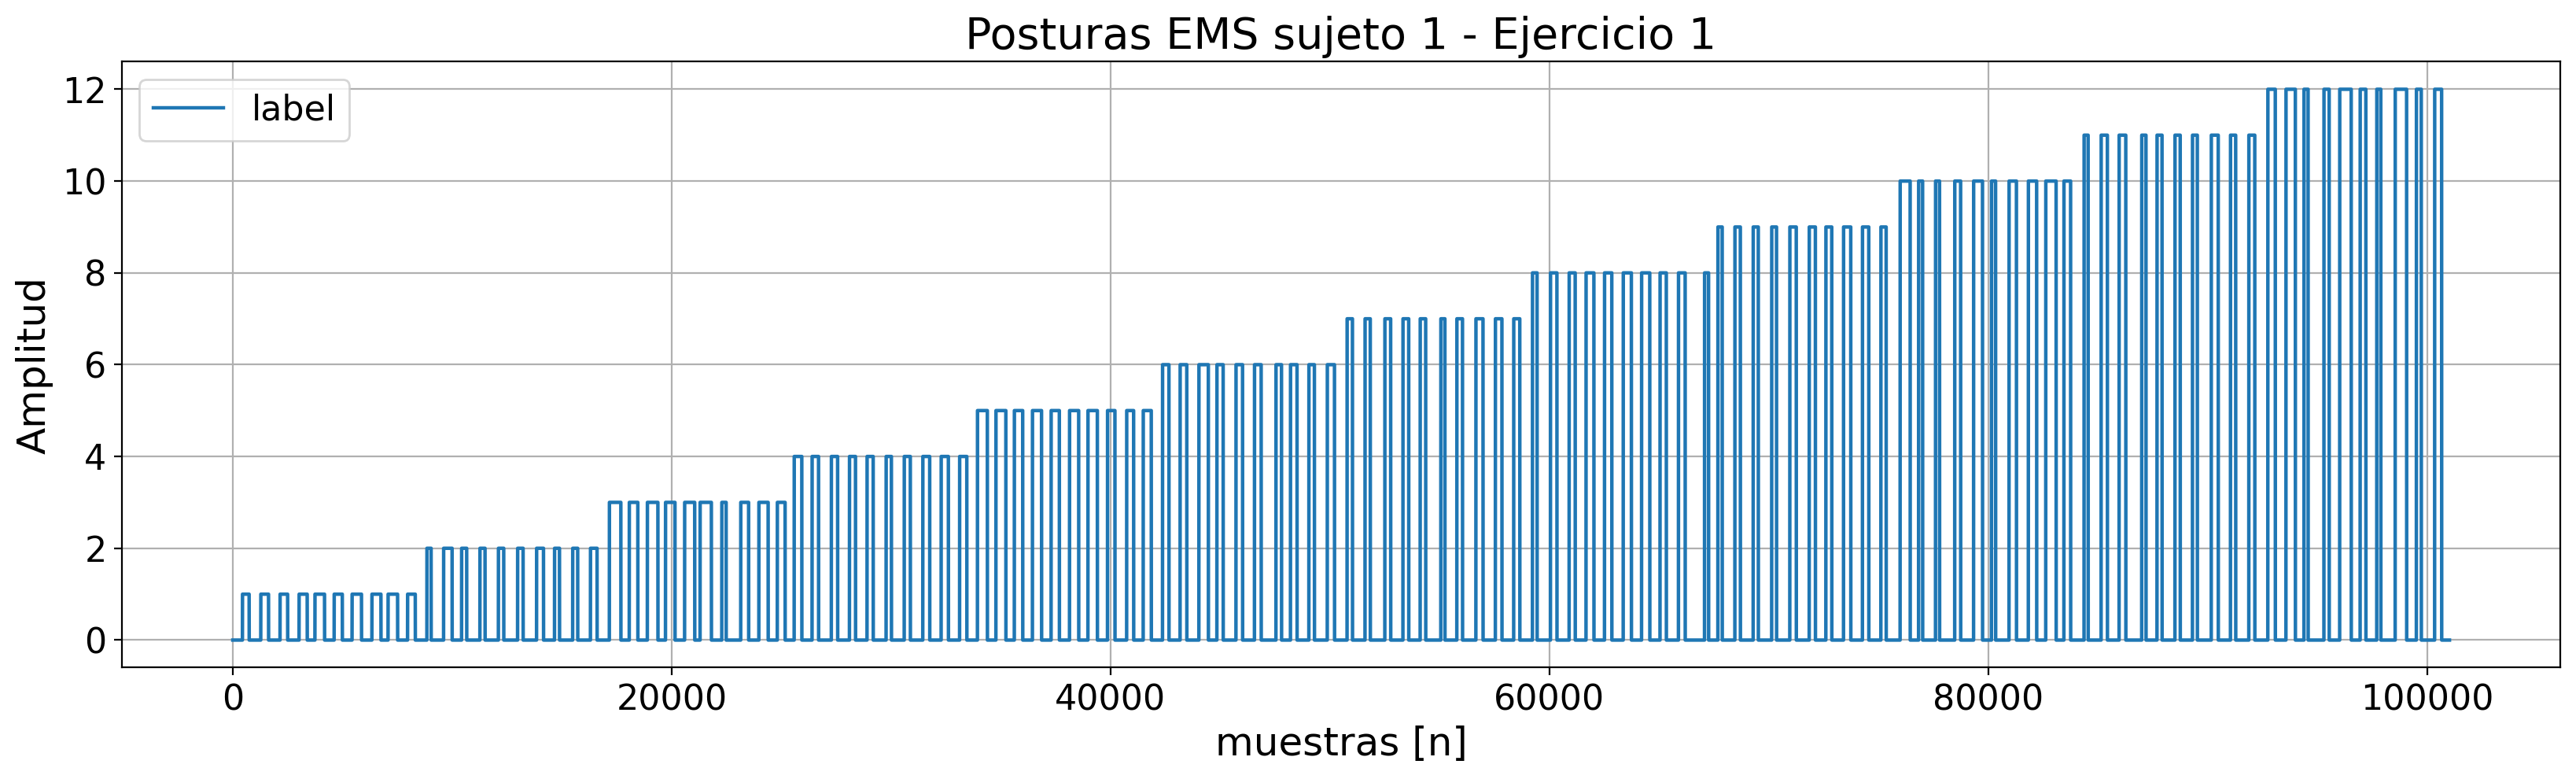

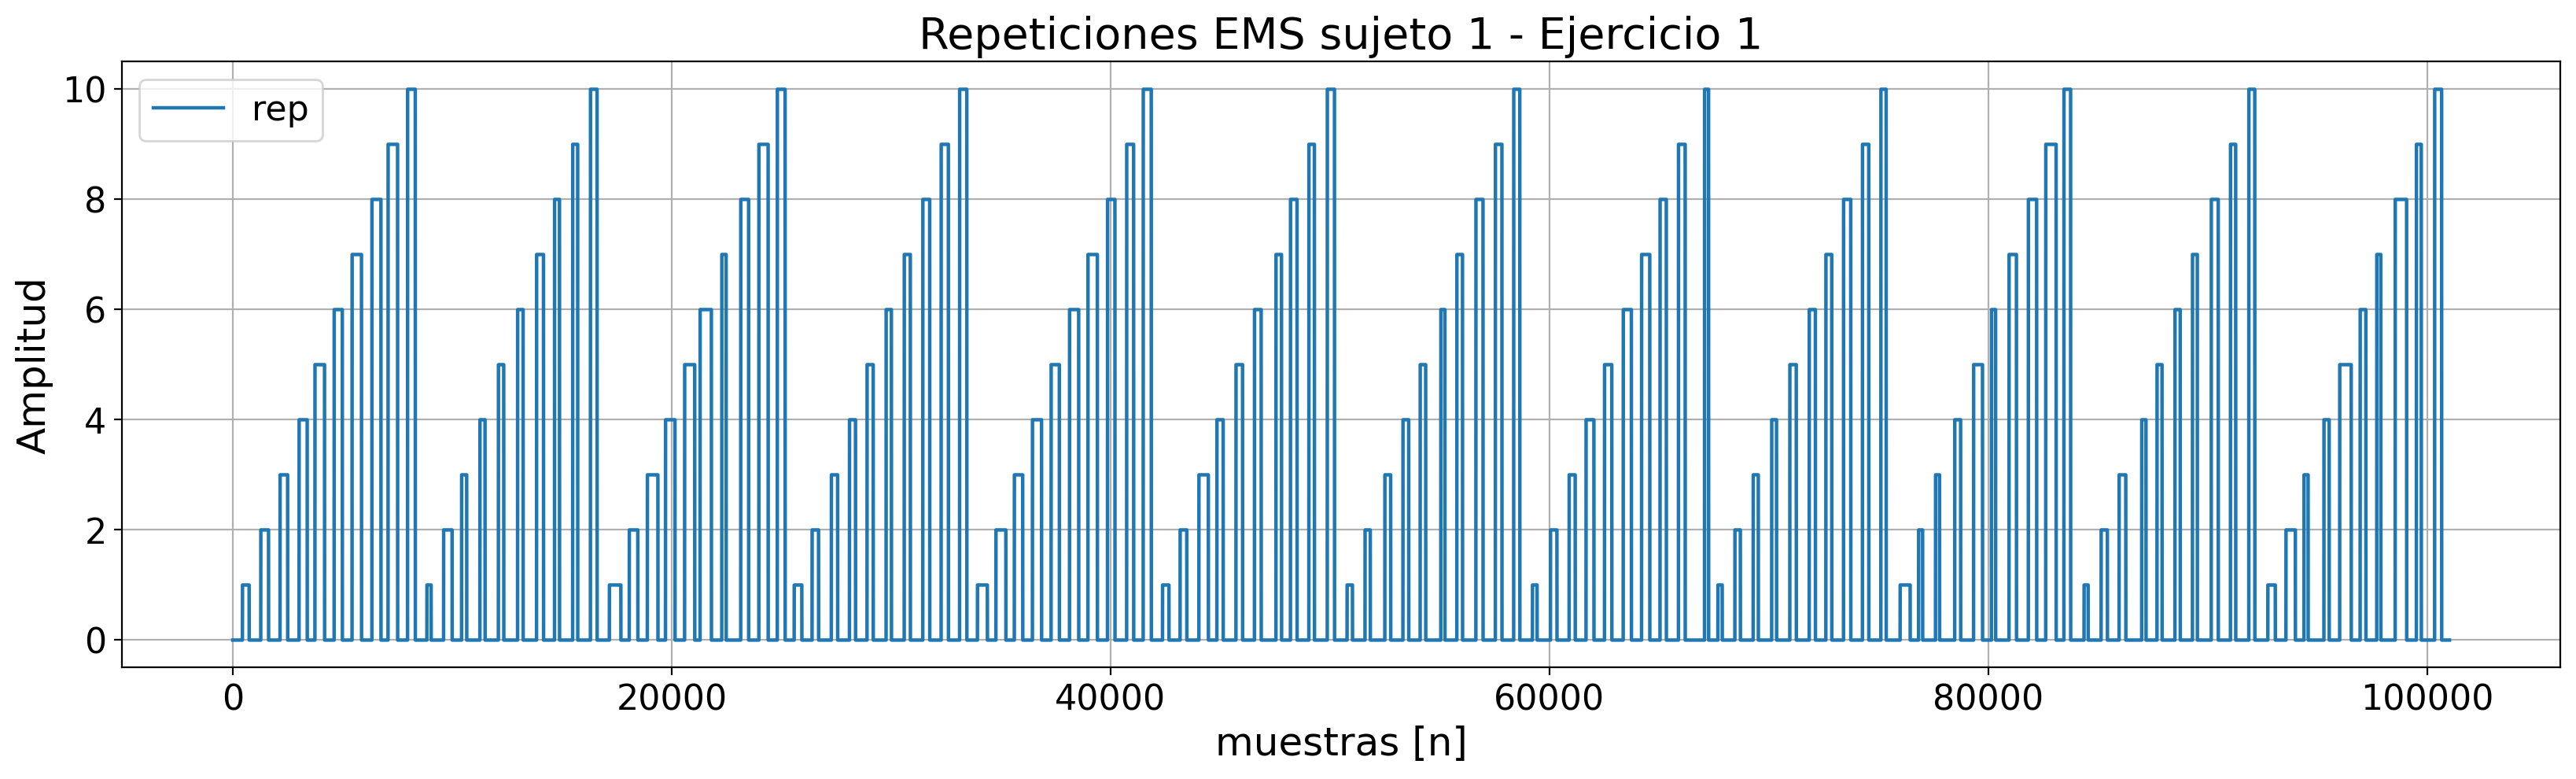

In [51]:
df_s1 = data_base_filter[data_base_filter['s'] == 1]
graficar_medida(df_s1, 
                columnas=['emg_1','emg_2','emg_3','emg_4','emg_5','emg_6','emg_7','emg_8','emg_9','emg_10'], 
                titulo = "Canales EMS sujeto 1 - Ejercicio 1")

graficar_medida(df_s1, 
                columnas=['label'], 
                titulo = "Posturas EMS sujeto 1 - Ejercicio 1")

graficar_medida(df_s1, 
                columnas=['rep'], 
                titulo = "Repeticiones EMS sujeto 1 - Ejercicio 1")

En la siguiente grafica se hace enfasis en las repeticiones del ejercicio 1

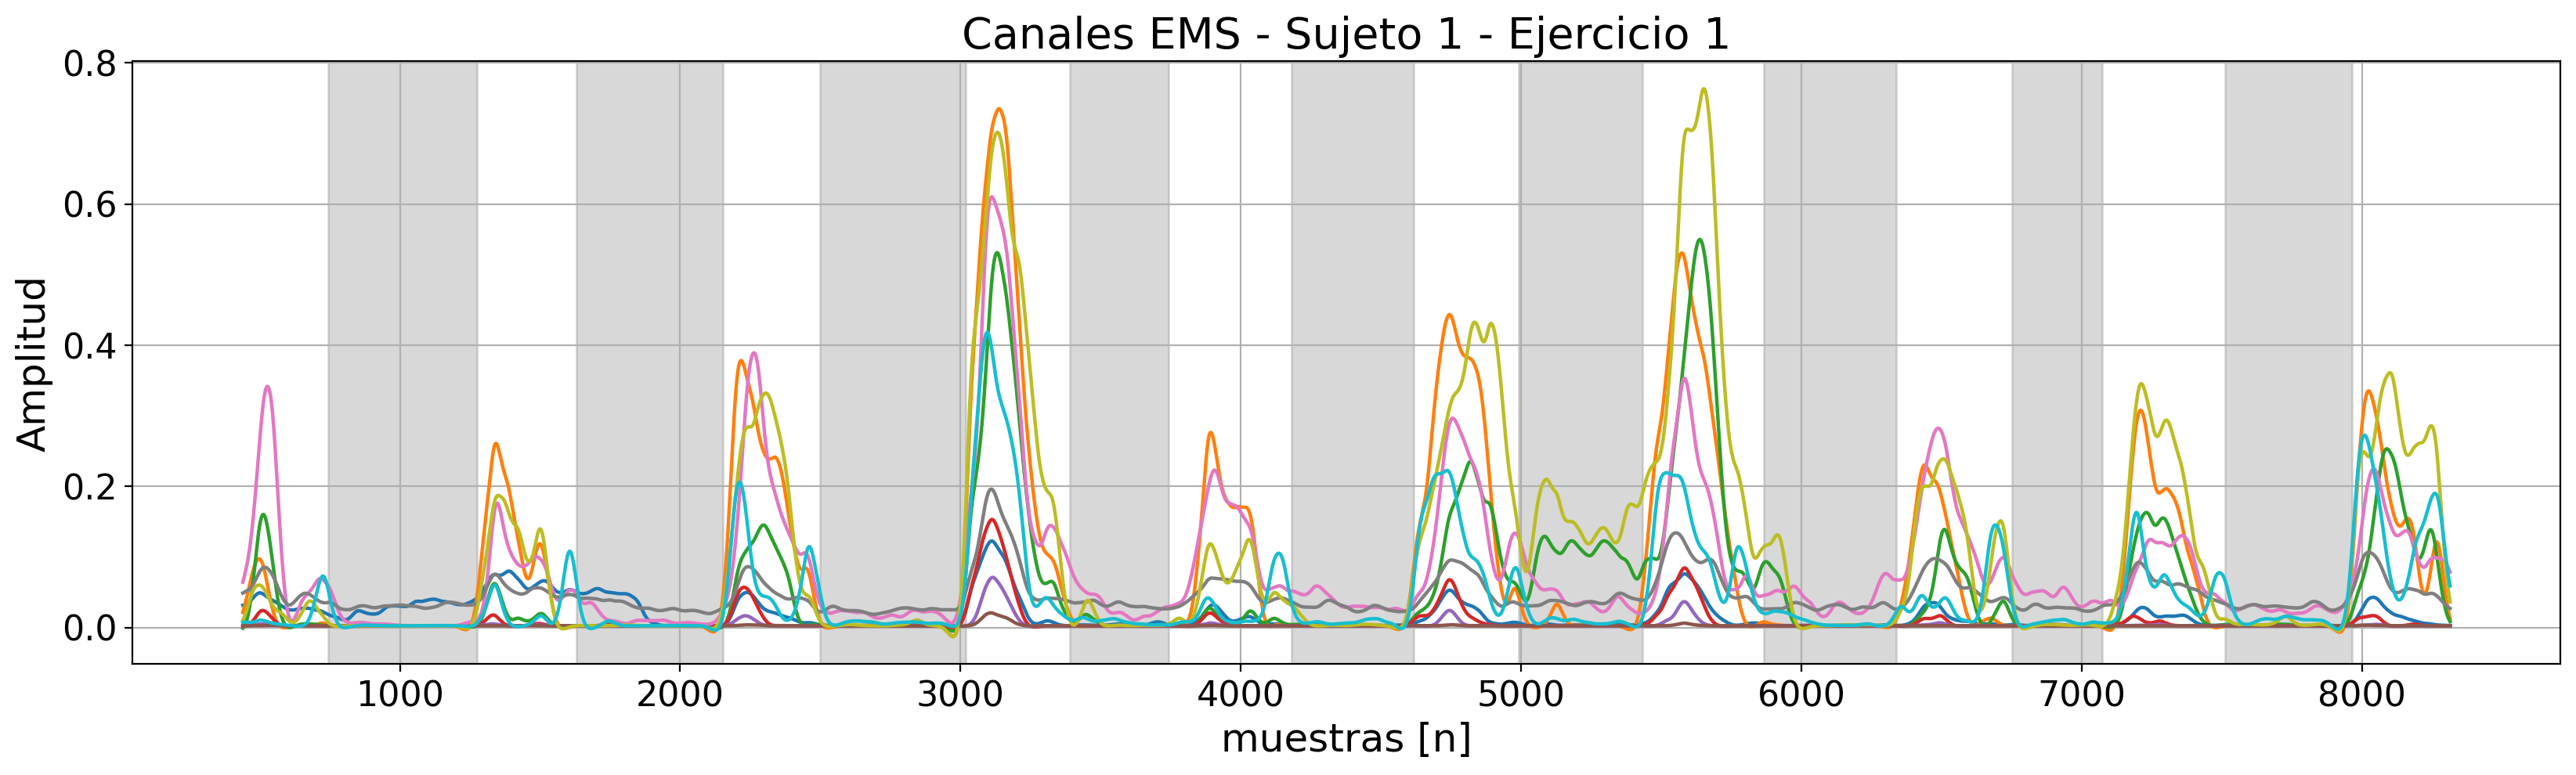

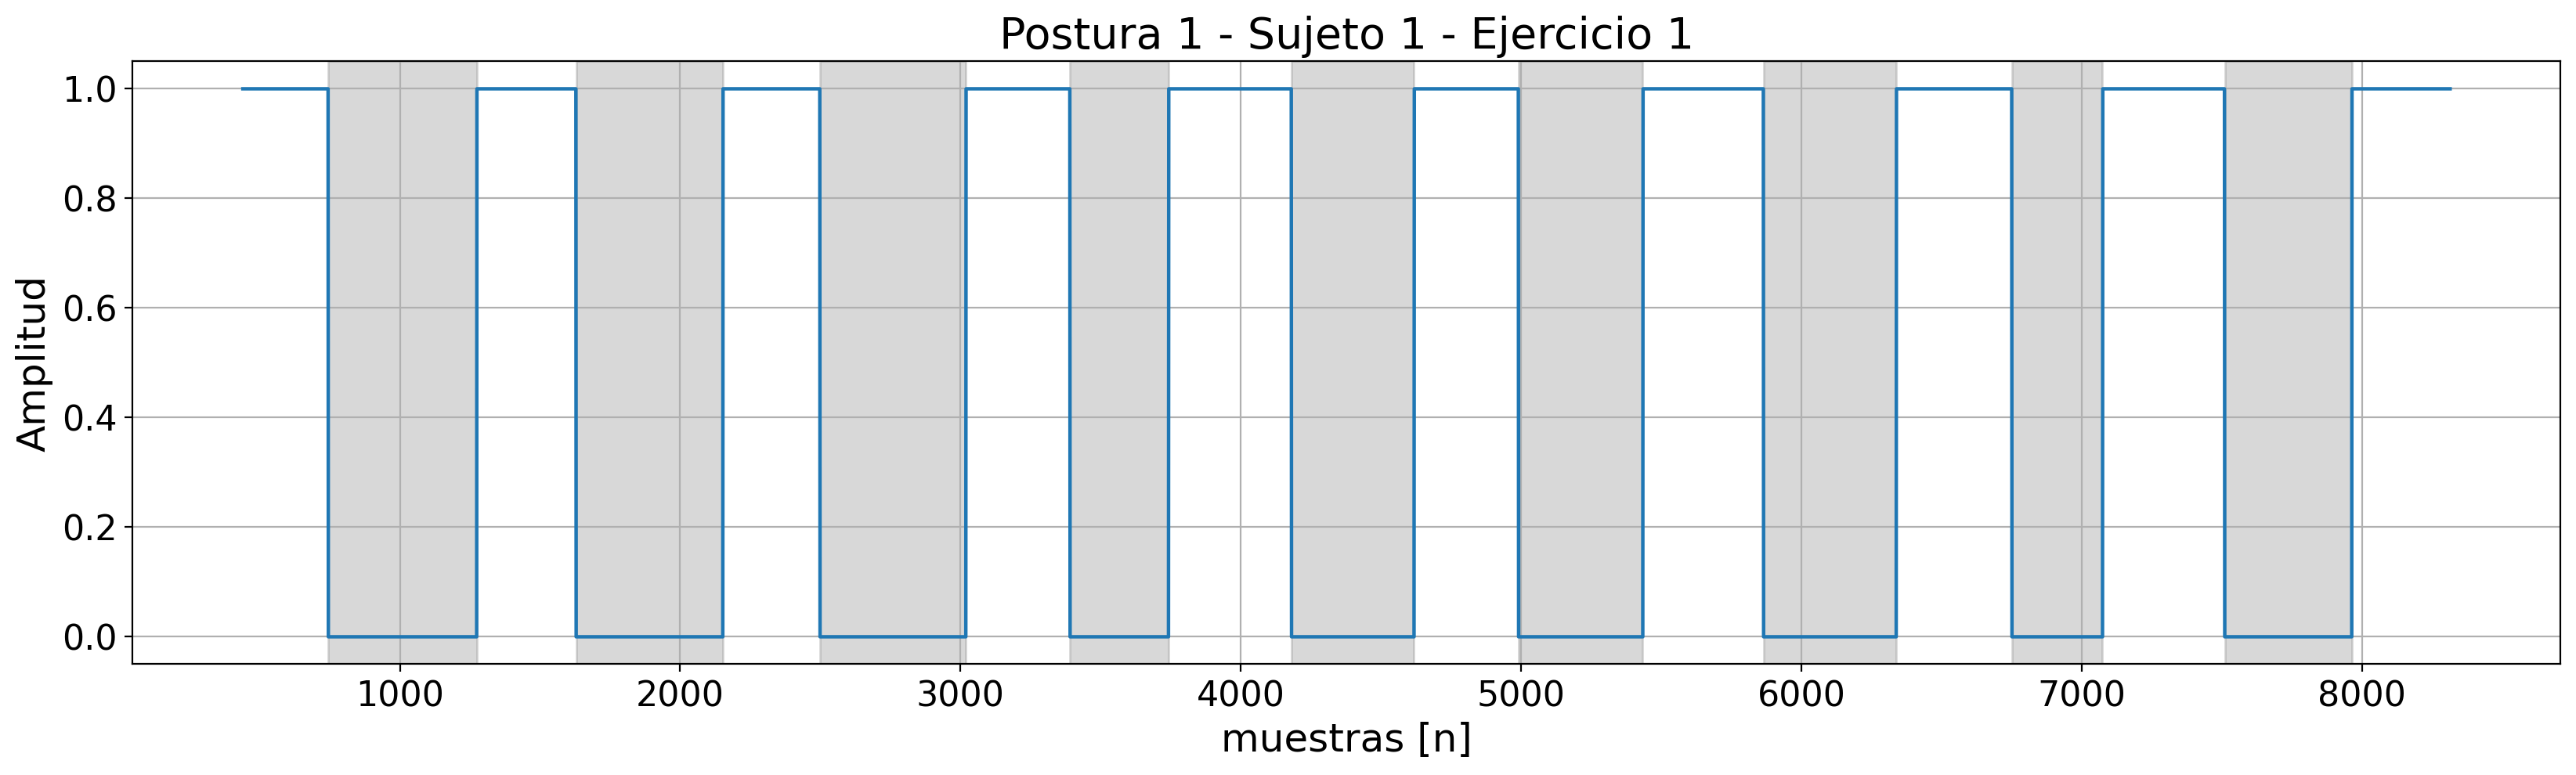

In [52]:
graficar_medida2(df_s1, 
                 columnas = df_s1.columns[1:11], 
                 labels = df_s1['label'],
                 num = 1, 
                 fs = None,
                 titulo="Canales EMS - Sujeto 1 - Ejercicio 1"
                 )

graficar_medida2(df_s1, 
                 columnas = ['label'], 
                 labels = df_s1['label'],
                 num = 1, 
                 fs = None,
                 titulo="Postura 1 - Sujeto 1 - Ejercicio 1"
                 )

In [53]:
data_base_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2731393 entries, 0 to 2731392
Data columns (total 13 columns):
 #   Column  Dtype  
---  ------  -----  
 0   s       int8   
 1   emg_1   float64
 2   emg_2   float64
 3   emg_3   float64
 4   emg_4   float64
 5   emg_5   float64
 6   emg_6   float64
 7   emg_7   float64
 8   emg_8   float64
 9   emg_9   float64
 10  emg_10  float64
 11  rep     uint8  
 12  label   uint8  
dtypes: float64(10), int8(1), uint8(2)
memory usage: 216.2 MB


In [66]:
print(data_base_filter.shape)
print(data_base_filter.isna().sum())

(2731393, 13)
s         0
emg_1     0
emg_2     0
emg_3     0
emg_4     0
emg_5     0
emg_6     0
emg_7     0
emg_8     0
emg_9     0
emg_10    0
rep       0
label     0
dtype: int64


In [67]:
# Exportamos el dataframe a un archivo CSV
data_base_filter.to_csv('./datasets/dataset.csv', index=False)

Hasta aqui queda la base de datos estructurada. La siguiente parte consiste en meterla al modelo y rezar para que de.

## Referencias

* https://github.com/parasgulati8/NinaPro-Helper-Library
* https://github.com/Lif3line/nina_helper_package_mk2
* https://github.com/cnzero/NinaproCNN/tree/master
* https://github.com/sebastiankmiec/NinaTools
* https://github.com/sun2009ban/divide_NinaPro_database_5
* https://github.com/tsagkas/sEMG-HandGestureRecognition 
* https://repositorio.unbosque.edu.co/items/61d39597-5a61-491c-909a-849e53efe8ad
* https://github.com/parasgulati8/NinaPro-Helper-Library/blob/master/
* https://pmc.ncbi.nlm.nih.gov/articles/PMC1455479/#sec2
* https://github.com/emckiernan/electrophys
* https://github.com/emckiernan/electrophys/blob/master/EMG/EMGbasics/code/EMGvisualization.ipynb
* https://gist.github.com/emckiernan/005e971b29a4a0532ee804869470f426
* https://electrophys.wordpress.com/
* https://electrophys.wordpress.com/home/dataanalysis/extraccion-y-visualizacion-datos/
* https://electrophys.wordpress.com/home/electromyography/graphing-and-exploring-emg-data/
* https://electrophys.wordpress.com/home/electromyography/filtering-and-analyzing-emg-data/